# Lab Assignment: Time-Series Prediction with RNN
# Objective:
In this exercise, you will learn to implement a basic RNN model using Python and TensorFlow/Keras to predict future stock prices based on historical data.
# Dataset:
Download the dataset: Stock Price Dataset - AAPL (Apple Inc.).  
https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data  
This dataset contains daily stock prices (open, high, low, close, volume) for Apple Inc.
from 2005 to 2017.
# Exercise Steps:
1. Data Preprocessing:
- Load the dataset and focus on the 'Close' price column, as this will be your target variable for prediction.
- Normalize the data (e.g., using Min-Max scaling to keep values between 0 and 1).
- Split the dataset into a training set (80%) and a testing set (20%).
2. Create Training Sequences:
- Convert the 'Close' prices into a series of sequences for training.
- Define a sequence length (e.g., 60 days), where each sequence will be
used to predict the stock price for the next day.

3. Build the RNN Model:
- Define an RNN model with the following architecture:
 - An RNN layer with 50 units
 - A Dense layer with 1 unit (for regression output)
- Use the mean squared error (MSE) loss function and the Adam optimizer.
4. Train the Model:
- Train the model on the training set for 50 epochs with a batch size of 32.
- Use validation data to check for overfitting.
5. Make Predictions:
- Predict the stock prices on the test set and transform the results back to
the original scale if normalization was applied.
- Plot the predicted vs. actual stock prices to visualize the model’s
performance.
6. Evaluation:
- Calculate the mean absolute error (MAE) and root mean squared error
(RMSE) on the test set.
- Discuss how well the model performed based on these metrics.

Deliverables:
- Submit your Python code, a plot of predicted vs. actual stock prices, and a brief report (300-500 words) discussing the results and any observed limitations.

# imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.layers import Input
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:
# Load the csv data
df = pd.read_csv('drive/MyDrive/NNDL_LAB/HistoricalQuotes.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


#Data Preprocessing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df[' Close/Last'] = df[' Close/Last'].str.replace('$', '').astype(float).values
df[' Open'] = df[' Open'].str.replace('$', '').astype(float).values
df[' High'] = df[' High'].str.replace('$', '').astype(float).values
df[' Low'] = df[' Low'].str.replace('$', '').astype(float).values

df = df[['Date', ' Close/Last']].sort_values('Date')
df.set_index('Date', inplace=True)

In [4]:
# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[[' Close/Last']])


#Create Training Sequences

In [5]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

sequence_length = 60  # Use the last 60 days to predict the next day's price

In [6]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])  # Sequence of 60 days
        y.append(data[i, 0])  # Predict next day's 'Close'
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#Build the RNN Model

In [7]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0294 - val_loss: 0.0207
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3443e-04 - val_loss: 0.0121
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.7230e-04 - val_loss: 0.0086
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2123e-04 - val_loss: 0.0068
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2515e-04 - val_loss: 0.0047
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0278e-04 - val_loss: 0.0034
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.6016e-05 - val_loss: 0.0028
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1670e-05 - val_loss: 0.0027
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.1288e-05 - val_loss: 0.0027
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.0880e-05 - val_loss: 0.0019
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8157e-05 - val_loss: 0.0017
Epoch 12/50
62/62 ━━━━━

#Make Predictions

In [9]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [10]:
# Inverse transform the predictions and the actual values back to the original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_inv = scaler.inverse_transform(predictions)

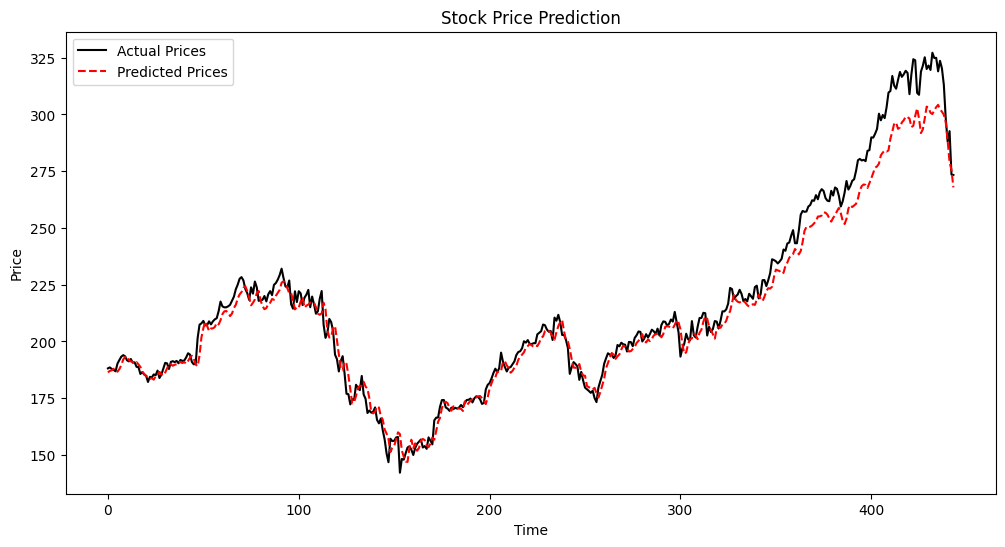

In [14]:
# Plot Predicted vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Prices', color='black')
plt.plot(predictions_inv, label='Predicted Prices', color='red', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluation

In [15]:
# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 5.584770008808858
Root Mean Squared Error (RMSE): 8.010669521894366


### Report:

The objective of this lab was to implement a basic Recurrent Neural Network (RNN) using Python and TensorFlow/Keras to predict future stock prices based on historical data. The model was evaluated using two key metrics: **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

#### Model Evaluation Results

The model's performance was quantified using the following evaluation metrics:

- **Mean Absolute Error (MAE):** 5.58
- **Root Mean Squared Error (RMSE):** 8.01

These values give us insight into the model's accuracy and its ability to predict future stock prices.

##### MAE (Mean Absolute Error):
The MAE of 5.58 indicates that, on average, the model's predictions deviate by approximately 5.58 units from the actual stock prices. This suggests a moderate level of accuracy in predicting the future price. MAE is a straightforward measure of prediction error and is easy to interpret, as it represents the average magnitude of errors in the same units as the stock price. A lower MAE would suggest better accuracy.

##### RMSE (Root Mean Squared Error):
The RMSE of 8.01 reflects the model's average error magnitude, but with a greater penalty for larger errors due to the squaring of differences. RMSE is more sensitive to outliers than MAE, so the model's performance can be heavily influenced by a few large errors. An RMSE of 8.01 suggests that the model occasionally produces predictions that are farther away from the actual values, which can be problematic in real-world applications, especially when making high-stakes financial decisions. Ideally, RMSE should be minimized for more precise predictions.

#### Observed Limitations

1. **Model Simplicity:**
   The model uses a **Simple RNN**, which is relatively basic compared to more advanced architectures like **LSTM (Long Short-Term Memory)** or **GRU (Gated Recurrent Units)**. Simple RNNs struggle with learning long-term dependencies due to their vanishing gradient problem, which could explain why the model might not generalize well for more complex time-series patterns. Switching to an LSTM or GRU layer might improve performance by better capturing long-term trends in the stock data.

2. **Lack of Feature Engineering:**
   The model uses only the 'Close' price as a predictor for future prices. In practice, stock price prediction models benefit from a richer set of features, such as averages, volume... Incorporating additional features could provide more context to the model and improve its predictive power.

3. **Data Preprocessing and Temporal Patterns:**
   The model uses a fixed window size of 60 days to predict the next day's price. However, stock prices are influenced by various factors, including market sentiment, macroeconomic conditions, and news events. The model does not account for these factors, and a more sophisticated feature selection and data preprocessing pipeline could yield better results. Additionally, the model does not consider seasonality or non-stationary behavior of the data.

4. **Overfitting and Generalization:**
   Although the model is trained on a large portion of the data (80%), it is possible that the model might overfit to historical patterns that do not generalize well to future, unseen data. Regularization techniques, such as dropout layers or early stopping, could be implemented to address overfitting.

#### Conclusion

The RNN model shows some predictive capability, but its performance could be significantly improved. The MAE and RMSE values suggest that while the model has moderate accuracy, there are still considerable errors in the predictions. More advanced models, better feature engineering, and the inclusion of additional data sources would likely lead to better stock price predictions. Moreover, addressing the limitations of the current architecture (i.e., using LSTM or GRU) could further enhance the model's performance.